In [1]:
#hi

In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import datasets
from torchvision import transforms
from copy import deepcopy
import torch.optim as optim

from tqdm.notebook import tqdm 
import numpy as np



In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/Users/asus/Desktop/term6/student-por.csv" # write the path of your file
df = pd.read_csv(file_path, header=0) 
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [8]:
print(df)
for column in df.columns:
    df[column], _ = pd.factorize(df[column])

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [9]:
df['total score'] = df['G1'] + df['G2'] + df['G3']
df['average'] = df['total score']/3
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,total score,average
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1,0,0,1,0,0,1,1,1,0,1,...,1,0,0,0,1,1,0,0,1,0.333333
2,0,0,2,0,1,1,1,1,0,1,...,2,1,1,0,2,2,1,1,4,1.333333
3,0,0,2,0,0,1,0,2,1,2,...,2,0,0,1,3,3,2,2,7,2.333333
4,0,0,3,0,0,1,2,3,2,1,...,2,0,2,1,3,4,1,3,8,2.666667


In [10]:
y = df['average']

In [11]:
y

0      0.000000
1      0.333333
2      1.333333
3      2.333333
4      2.666667
         ...   
644    4.333333
645    7.666667
646    5.333333
647    6.666667
648    2.000000
Name: average, Length: 649, dtype: float64

In [12]:
X = df.drop(columns=['average'],axis=1)

In [14]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,1,1,0,1,...,0,1,0,0,0,1,1,0,0,1
2,0,0,2,0,1,1,1,1,0,1,...,0,2,1,1,0,2,2,1,1,4
3,0,0,2,0,0,1,0,2,1,2,...,1,2,0,0,1,3,3,2,2,7
4,0,0,3,0,0,1,2,3,2,1,...,0,2,0,2,1,3,4,1,3,8


In [15]:
X = X.values
y = y.values

In [16]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((519, 34), (130, 34))

In [17]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [18]:
X_train

tensor([[ 0.,  0.,  0.,  ..., 12., 11., 34.],
        [ 0.,  1.,  3.,  ...,  0.,  1.,  3.],
        [ 0.,  1.,  0.,  ...,  0.,  1.,  7.],
        ...,
        [ 0.,  1.,  3.,  ...,  8.,  5., 16.],
        [ 1.,  0.,  2.,  ...,  7.,  7., 20.],
        [ 0.,  1.,  2.,  ...,  1.,  1.,  4.]])

In [19]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [20]:
y_train

tensor([11,  1,  2,  2,  4,  3,  7,  8, 13,  3,  4,  2,  2,  5,  5, 10,  3,  3,
         6,  1,  7,  7,  7,  5,  3,  6,  3,  5,  2,  2,  3,  5,  7,  3,  5,  5,
         2,  9, 13,  2,  4,  2,  3,  3, 10,  6, 10,  6, 11,  3,  3,  7,  3,  0,
         6,  0,  6,  8,  2,  3,  8,  9,  1,  7,  2,  5,  2,  2,  2,  3,  3,  7,
         9,  3,  7,  1,  5,  8,  2,  3,  6,  2,  1,  2,  5,  7,  8,  0,  3,  1,
         5,  1,  4,  3,  3,  5,  3,  5,  6,  0,  3,  1,  3, 11,  5,  3,  0,  4,
         7,  5,  2,  2,  4,  1,  7,  8,  5,  0,  5,  2,  3, 10,  7,  8,  1,  0,
         4,  2,  2,  6,  4,  3,  3,  3,  2,  5,  3,  8,  4, 13,  6,  9,  5,  3,
         2,  4,  0,  0, 10,  5,  8,  9,  3, 11,  9,  1,  2,  5,  2,  9,  5,  1,
         2,  6,  4,  5,  3,  2,  5,  4,  2,  2,  4,  5,  9,  2,  4,  7,  3,  2,
         7,  3,  5,  8,  3,  3,  3,  4, 10,  3,  2,  2,  4,  5, 11,  9, 10,  2,
         2,  2,  5,  9,  2,  3,  5,  3,  2,  9,  4,  6,  2,  3,  1,  3,  3,  2,
         8,  9,  2,  4,  3,  6,  7,  8, 

In [26]:
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, num_inputs=34, num_hidden=649, num_2=649, num_output=15, dropout_rate=0.5, weight_decay=0.01):
        super().__init__()
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(num_hidden, num_2)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.out = nn.Linear(num_2, num_output)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.out(x)
        return x

In [27]:
torch.manual_seed(41)
model = Model()

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01, weight_decay=0.01)

In [29]:

unique_labels = torch.unique(y_train)


for i, label in enumerate(unique_labels):
    y_train = torch.where(y_train == label, i, y_train)
    y_test = torch.where(y_test == label, i, y_test)


In [30]:

epochs = 200
losses = []
for i in range(epochs):

    y_pred = model.forward(X_train) 

    loss = criterion(y_pred , y_train)

    #losses.append(loss.detach().numpy())
    losses.append(loss.item())
    if i % 10 == 0:
        print(f'epoch{i} and loss = {loss}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch0 and loss = 3.1393706798553467
epoch10 and loss = 1.9962482452392578
epoch20 and loss = 1.4737821817398071
epoch30 and loss = 1.1266535520553589
epoch40 and loss = 1.0313643217086792
epoch50 and loss = 0.9481154680252075
epoch60 and loss = 0.8813193440437317
epoch70 and loss = 0.8374524712562561
epoch80 and loss = 0.8283032178878784
epoch90 and loss = 0.7844775319099426
epoch100 and loss = 0.7760350704193115
epoch110 and loss = 0.7638183236122131
epoch120 and loss = 0.7038099765777588
epoch130 and loss = 0.678835391998291
epoch140 and loss = 0.6955588459968567
epoch150 and loss = 0.6658716201782227
epoch160 and loss = 0.6728125214576721
epoch170 and loss = 0.6857091188430786
epoch180 and loss = 0.6490954160690308
epoch190 and loss = 0.6372958421707153


Text(0.5, 0, 'epoch')

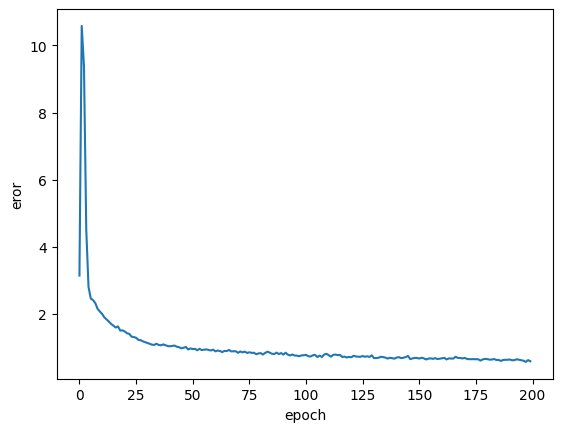

In [31]:
plt.plot(range(epochs), losses)
plt.ylabel("eror")
plt.xlabel("epoch")

In [32]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [33]:
loss

tensor(1.3661)

In [34]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        print (f'{i+1}. {str(y_val)} \t {y_test[i]}')

1. tensor([-1.2489, -0.9726, -3.6324, -5.5912, -6.1211, -7.5420, -4.5402,  1.5200,
         3.6079,  4.8313,  7.5893,  7.5896,  7.1352,  8.0521,  4.5078]) 	 12
2. tensor([ 5.1256,  9.4351,  9.2935,  0.5158, -0.6228, -1.4177, -4.8475, -1.0652,
        -2.9455, -0.6398, -1.8036, -1.2859, -1.6505, -2.2049, -1.9643]) 	 1
3. tensor([-2.6152, -2.7661, -7.6913, -5.4746, -6.3895, -3.3930,  1.4305,  4.1277,
         7.4382,  7.6371,  8.8471,  7.9424,  4.5873,  6.2230,  3.3436]) 	 11
4. tensor([-2.1763,  4.6893,  5.9241,  3.7128,  3.9230,  2.8610, -2.0822, -1.8766,
        -1.7846, -1.5111, -1.6094, -1.8725, -1.8886, -2.4975, -2.1458]) 	 2
5. tensor([ 3.4650,  7.7369,  9.8480,  4.2376, -2.6406, -4.7991, -3.1056, -0.8926,
        -2.2783, -0.7285, -1.7013, -1.6087, -1.5523, -2.3615, -1.9204]) 	 1
6. tensor([-3.6555, -1.9514, -1.2982,  2.4281,  4.2650,  6.0137,  3.9448,  0.3665,
         1.8305, -1.0797,  0.3031, -1.5305, -1.6795, -2.4109, -1.9125]) 	 6
7. tensor([-2.2013, -2.6112, -6.5419, -5.330

In [35]:
def calculate_accuracy(y_true, y_pred):
   
   
    _, predicted = torch.max(y_pred, 1)
    
    
    correct = (predicted == y_true).sum().item()
    total = y_true.size(0)
    accuracy = correct / total
    
    return accuracy


In [36]:

with torch.no_grad():
    y_pred_train = model(X_train)
    train_accuracy = calculate_accuracy(y_train, y_pred_train)
    print("Training Accuracy:", train_accuracy)

    y_pred_test = model(X_test)
    test_accuracy = calculate_accuracy(y_test, y_pred_test)
    print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.8015414258188824
Testing Accuracy: 0.5153846153846153


In [37]:
import torch

def mean_squared_error(y_true, y_pred):
    
    mse = torch.mean((y_true - y_pred)**2).item()
    return mse

def mean_absolute_error(y_true, y_pred):
   
    mae = torch.mean(torch.abs(y_true - y_pred)).item()
    return mae


In [38]:
# After training the model
from sklearn.metrics import r2_score

with torch.no_grad():
    y_pred_train = model(X_train)
    #mse_train = mean_squared_error(y_train, y_pred_train)
    #mae_train = mean_absolute_error(y_train, y_pred_train)
    #print("Training MSE:", mse_train)
    #print("Training MAE:", mae_train)

    y_pred_test = model(X_test)
    #mse_test = mean_squared_error(y_test, y_pred_test)
    #mae_test = mean_absolute_error(y_test, y_pred_test)
    #print("Testing MSE:", mse_test)
    #print("Testing MAE:", mae_test)

    print("Shape of y_true:", y_test.size())
    print("Shape of y_pred:", y_pred_test.size())

    y_true_indextrain = torch.argmax(y_train.unsqueeze(dim=0), dim=1).float()
    y_pred_indextrain = torch.argmax(y_pred_train.unsqueeze(dim=0), dim=1).float()

    y_true_indextest = torch.argmax(y_test.unsqueeze(dim=0), dim=1).float()
    y_pred_indextest = torch.argmax(y_pred_test.unsqueeze(dim=0), dim=1).float()

    print("Shape of y_true:", y_true_indextrain)
    print("Shape of y_pred:", y_pred_indextrain)
    mse_train = mean_squared_error(y_true_indextrain, y_pred_indextrain)
    mae_train = mean_absolute_error(y_true_indextrain, y_pred_indextrain)
    print("Training MSE:", mse_train)
    print("Training MAE:", mae_train)

    mse_test = mean_squared_error(y_true_indextest, y_pred_indextest)
    mae_test = mean_absolute_error(y_true_indextest, y_pred_indextest)
    print("Testing MSE:", mse_test)
    print("Testing MAE:", mae_test)

    

Shape of y_true: torch.Size([130])
Shape of y_pred: torch.Size([130, 15])
Shape of y_true: tensor([325.])
Shape of y_pred: tensor([[146., 146.,  68.,  26., 354., 193., 193.,  51., 121., 230., 230., 230.,
         230., 230., 230.]])
Training MSE: 28404.19921875
Training MAE: 150.3333282470703
Testing MSE: 8436.3330078125
Testing MAE: 80.5999984741211


In [39]:

y_pred_train = model(X_train)
r2 = r2_score(y_true_indextest.detach().numpy(), y_pred_indextest.detach().numpy())
print("R-squared:", r2)

ValueError: y_true and y_pred have different number of output (1!=15)